In [1]:
import matplotlib.pyplot as pp
from utils import *
from sinc import *
from FIM import *
%matplotlib inline
pp.rcParams['figure.dpi'] = 150
%config InlineBackend.figure_format = 'retina'

In [2]:
dimensions = [200*1] + [1024]*8 + [1*6]
percival_network = makenet(dimensions, softmax=False)

network_to_use = percival_network()

size=100000 #number training data

In [32]:
#loading the network
network_to_use.load_state_dict(torch.load(r"C:\Users\Luke\year-4-project-lisa\Luke\Term-2\ToyModel_Sinc\Trained-Models\ToyModel_sinc_l200-1024x8_2d_10000it.pt", map_location=torch.device('cpu')))
network_to_use.eval()

Net(
  (fc0): Linear(in_features=200, out_features=1024, bias=True)
  (fc1): Linear(in_features=1024, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=1024, bias=True)
  (fc5): Linear(in_features=1024, out_features=1024, bias=True)
  (fc6): Linear(in_features=1024, out_features=1024, bias=True)
  (fc7): Linear(in_features=1024, out_features=1024, bias=True)
  (fc8): Linear(in_features=1024, out_features=6, bias=True)
)

In [33]:
mutest = syntrain(5000, region=region, varx=['Mc', 'tc'], noise=1)
Mc = mutest[0][:,0]
tc = mutest[0][:,1]
idx = np.argsort(Mc)

In [5]:
#generate signals without noise to compare with network prediction
likeset_Mc = lambda: syntrain(size=100000, varx='Mc', region=region, noise=0)
likeset_tc = lambda: syntrain(size=100000, varx='tc', region=region, noise=0)

In [6]:
%%time
sl_Mc = synlike(mutest[2][:24,:], likeset_Mc, iterations=10000000)

Wall time: 7min 31s


In [7]:
%%time
sl_tc = synlike(mutest[2][:24,:], likeset_tc, iterations=10000000)

Wall time: 7min 34s


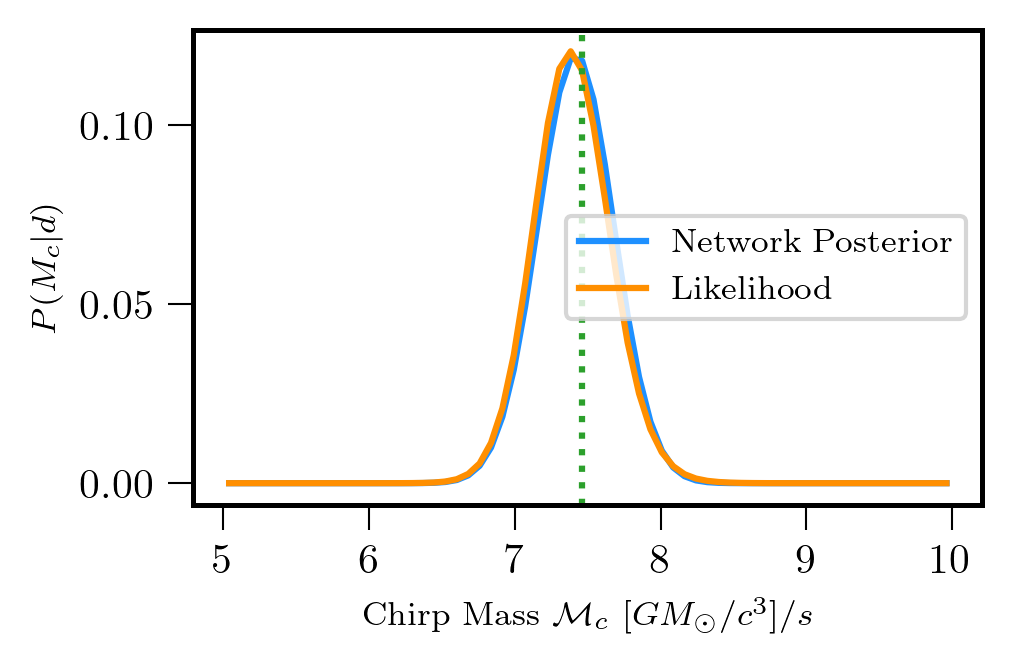

In [10]:
plotgauss(*mutest, net=network_to_use, varx='Mc', like=sl_Mc, twodim=True, istart=3)

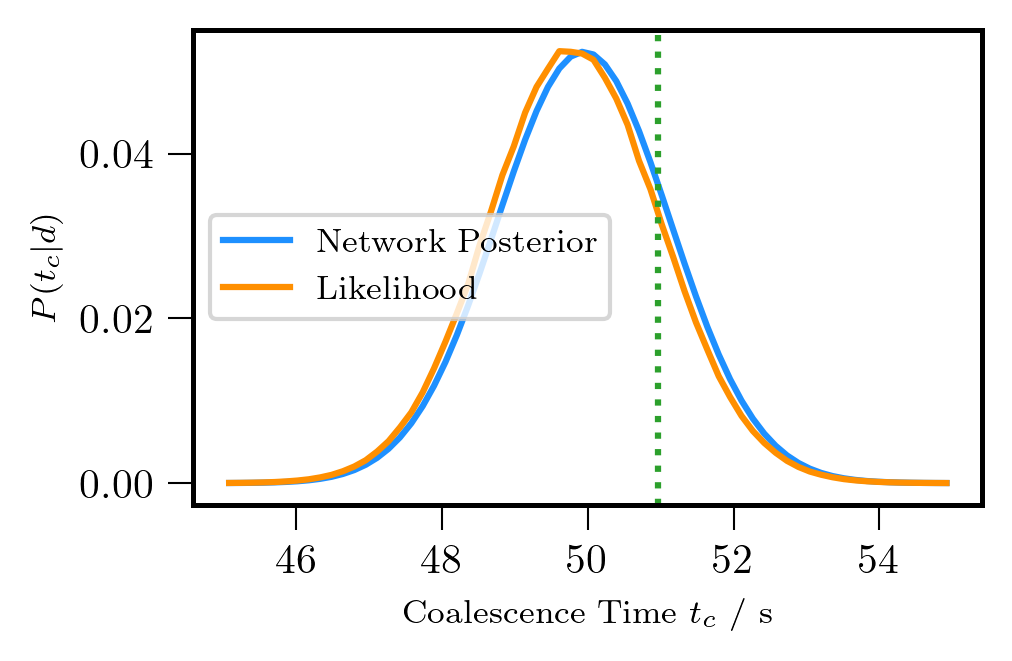

In [11]:
plotgauss(*mutest, net=network_to_use, varx='tc', like=sl_tc, twodim=True, istart=3)

In [15]:
%%time
likeset_2 = lambda: syntrain(size=100000, varx=['Mc','tc'], region=region, noise=0)
sl2 = synlike(mutest[2][:10,:], likeset_2, iterations=10000)

Wall time: 6.36 s


C:\Users\Luke\year-4-project-lisa\Luke\Term-2\sinc.py:336: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xs, ys, like[istart], colors=princetonorange, alpha=0.8, levels=[0.01*vmax,0.14*vmax,0.61*vmax],                      label='Likelihood')
C:\Users\Luke\year-4-project-lisa\Luke\Term-2\sinc.py:337: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xs, ys, q,              colors=dodgerblue, alpha=0.8, levels=[0.01*vmax,0.14*vmax,0.61*vmax],                      label='Network Posterior')


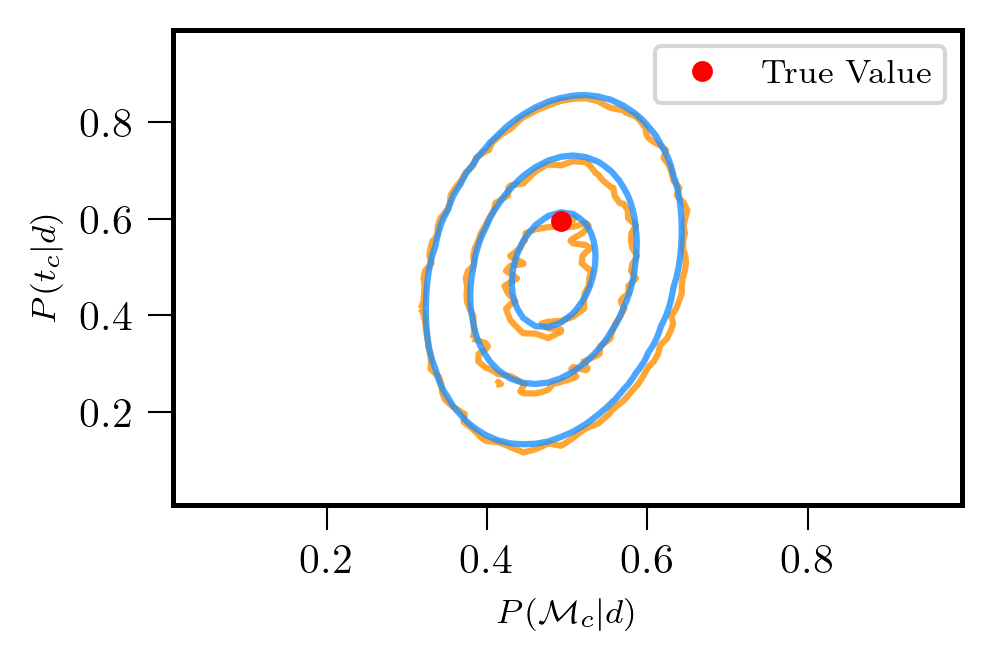

In [16]:
makecontour(*mutest, net=network_to_use, like=sl2, istart=3)

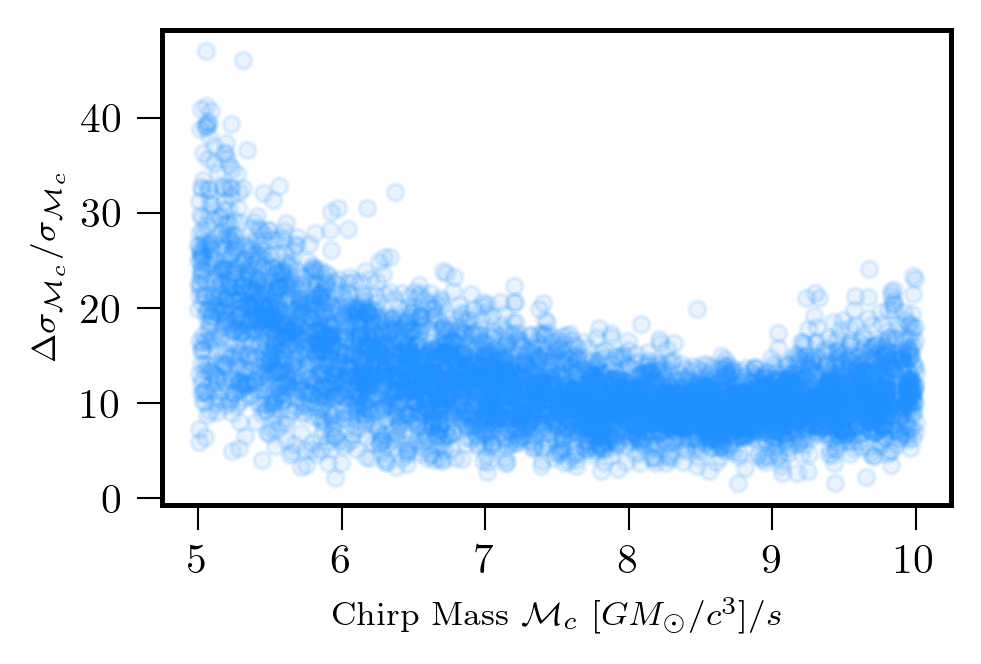

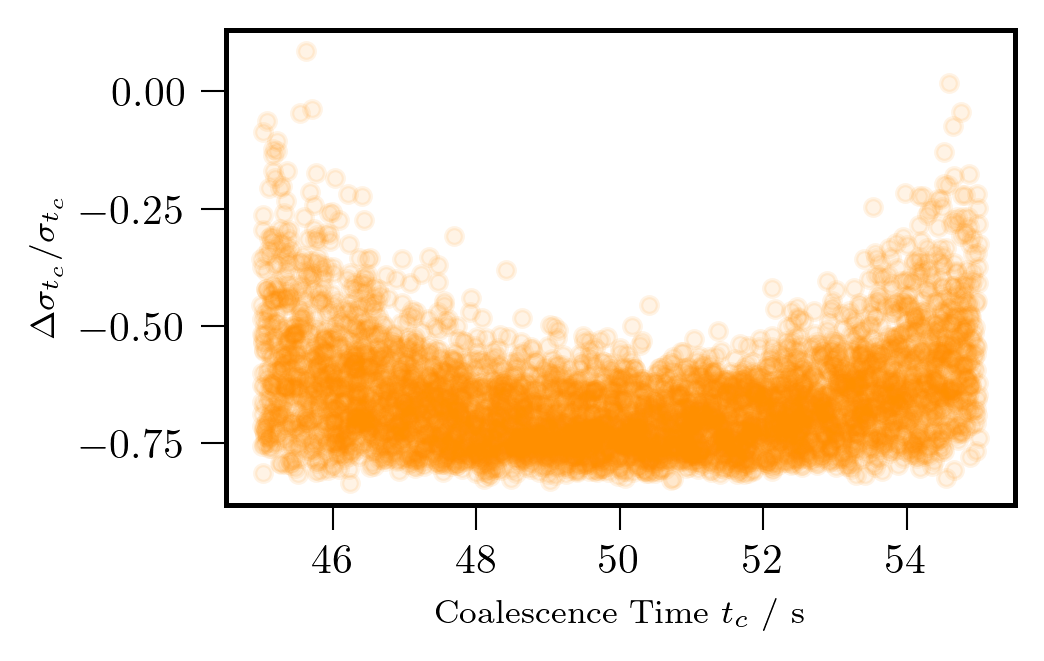

In [17]:
plotsigma(*mutest, net=network_to_use)

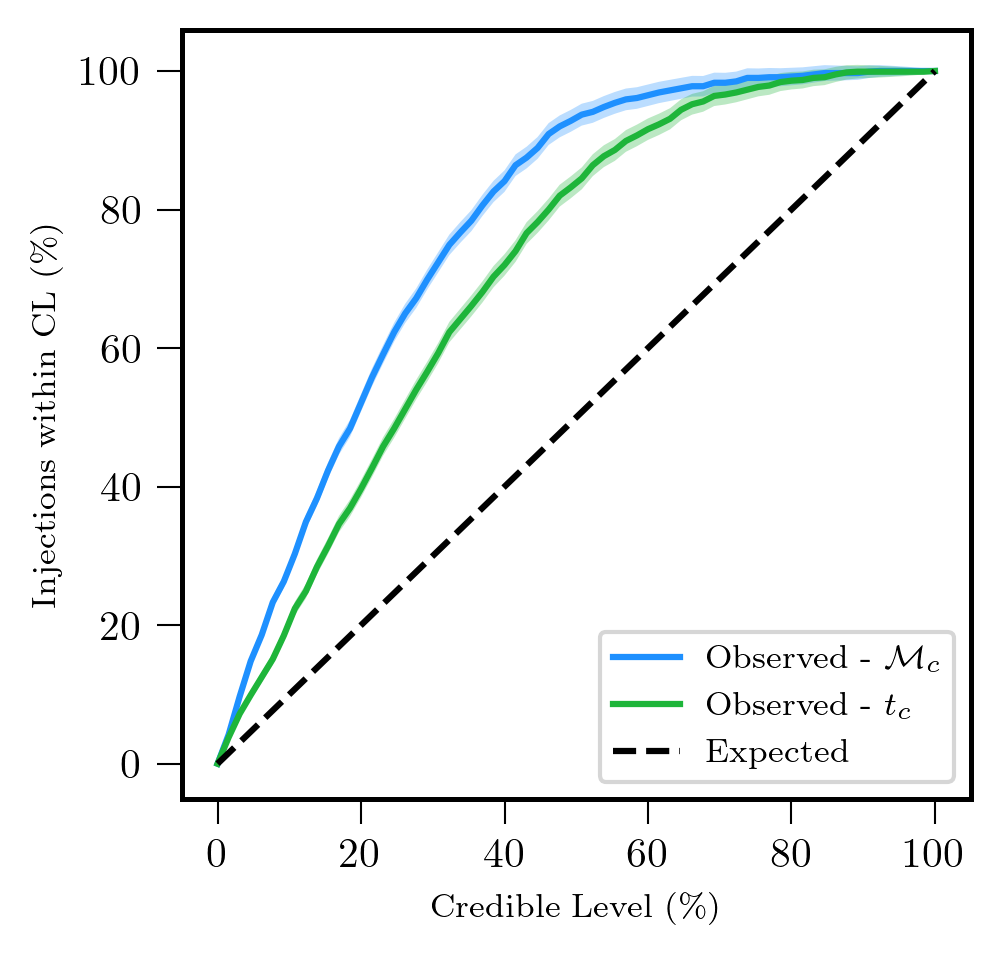

In [34]:
counts1, counts2, error, CR = p_p(*mutest, net=network_to_use, N=1000)
N=1000
y1 = counts1/N*100
y2 = counts2/N*100
yerr=100*error
ex_x = np.linspace(0, 1, 11)
ex_y = np.linspace(0, N, 11)
pp.figure(figsize=(fig_width, fig_width))
pp.ylabel('Injections within CL ($\%$)')
pp.xlabel("Credible Level ($\%$)")
pp.plot(CR*100, y1, color=dodgerblue, label='Observed - $\mathcal{M}_c$')
pp.plot(CR*100, y2, color=tanzaniagreen, markersize=2, label='Observed - $t_c$')
pp.fill_between(CR*100, y1-yerr, y1+yerr,facecolor=dodgerblue,alpha=0.3,edgecolor='none')
pp.fill_between(CR*100, y2-yerr, y2+yerr,facecolor=tanzaniagreen,alpha=0.3,edgecolor='none')
pp.plot(ex_x*100, ex_y/N*100, 'k--', label='Expected')
pp.legend(loc=4)
pp.show()

In [4]:
from ringdown import *

In [36]:
percival_network = makenet(dimensions, softmax=False)

ringdown_network = percival_network()

size=100000 #number training data
region = [[0.3,0.7], [3,7]] # total ranges are a [0,1], M[3, 7]

In [37]:
ringdown_network.load_state_dict(torch.load(r'C:\Users\Luke\year-4-project-lisa\Luke\Term-2\Ringdown\Trained-Models\ringdown2_l200-1024x8_2d_10000it.pt', map_location=torch.device('cpu')))
ringdown_network.eval()

Net(
  (fc0): Linear(in_features=200, out_features=1024, bias=True)
  (fc1): Linear(in_features=1024, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=1024, bias=True)
  (fc5): Linear(in_features=1024, out_features=1024, bias=True)
  (fc6): Linear(in_features=1024, out_features=1024, bias=True)
  (fc7): Linear(in_features=1024, out_features=1024, bias=True)
  (fc8): Linear(in_features=1024, out_features=6, bias=True)
)

In [38]:
mutest2 = syntrain_RD(5000, region=region, varx=['a', 'M'], noise=1)
a = mutest2[0][:,0]
M = mutest2[0][:,1]
idx = np.argsort(a)

In [23]:
#generate signals without noise to compare with network prediction
likeset_a = lambda: syntrain_RD(size=100000, varx='a', region=region, noise=0)
likeset_M = lambda: syntrain_RD(size=100000, varx='M', region=region, noise=0)
likeset_2_2 = lambda: syntrain_RD(size=100000, varx=['a','M'], region=region, noise=0)

In [24]:
%%time
sl_a = synlike(mutest2[2][:24,:], likeset_a, iterations=10000000)

Wall time: 2min 55s


In [25]:
%%time
sl_M = synlike(mutest2[2][:24,:], likeset_M, iterations=10000000)

Wall time: 2min 50s


In [26]:
%%time
sl2_2 = synlike(mutest2[2][:24,:], likeset_2_2, iterations=10000)

Wall time: 5.88 s


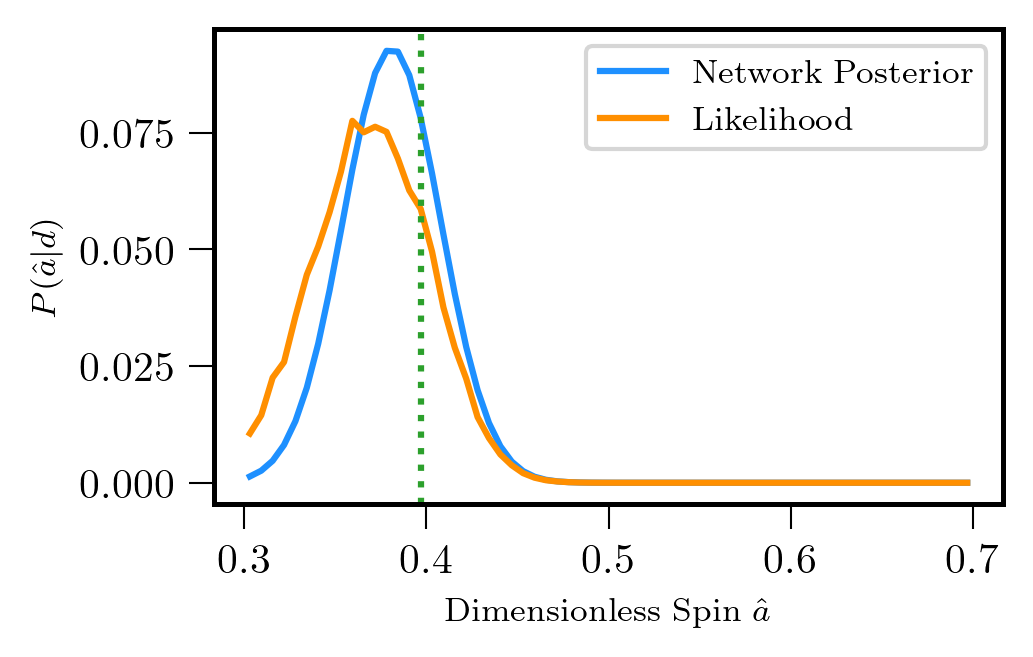

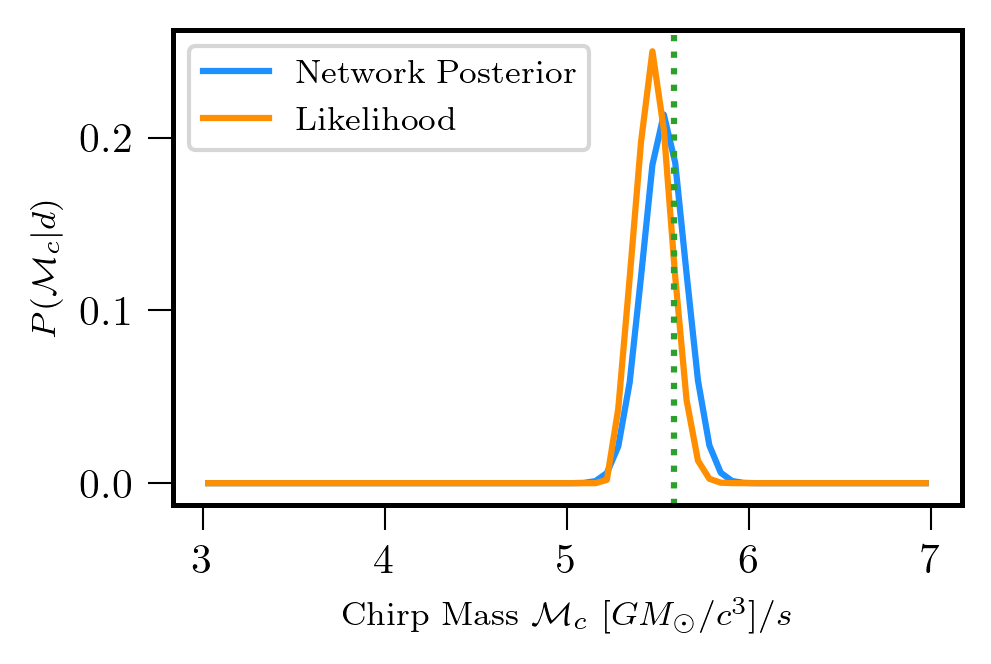

In [27]:
plotgauss_RD(*mutest2, net=ringdown_network, varx='a', like=sl_a, twodim=True, istart=2)
plotgauss_RD(*mutest2, net=ringdown_network, varx='M', like=sl_M, twodim=True, istart=2)

C:\Users\Luke\year-4-project-lisa\Luke\Term-2\ringdown.py:372: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xs, ys, like[istart], colors=princetonorange, alpha=0.8, levels=[0.01*vmax,0.14*vmax,0.61*vmax],                      label='Likelihood')
C:\Users\Luke\year-4-project-lisa\Luke\Term-2\ringdown.py:373: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xs, ys, q,              colors=dodgerblue, alpha=0.8, levels=[0.01*vmax,0.14*vmax,0.61*vmax],                      label='Network Posterior')


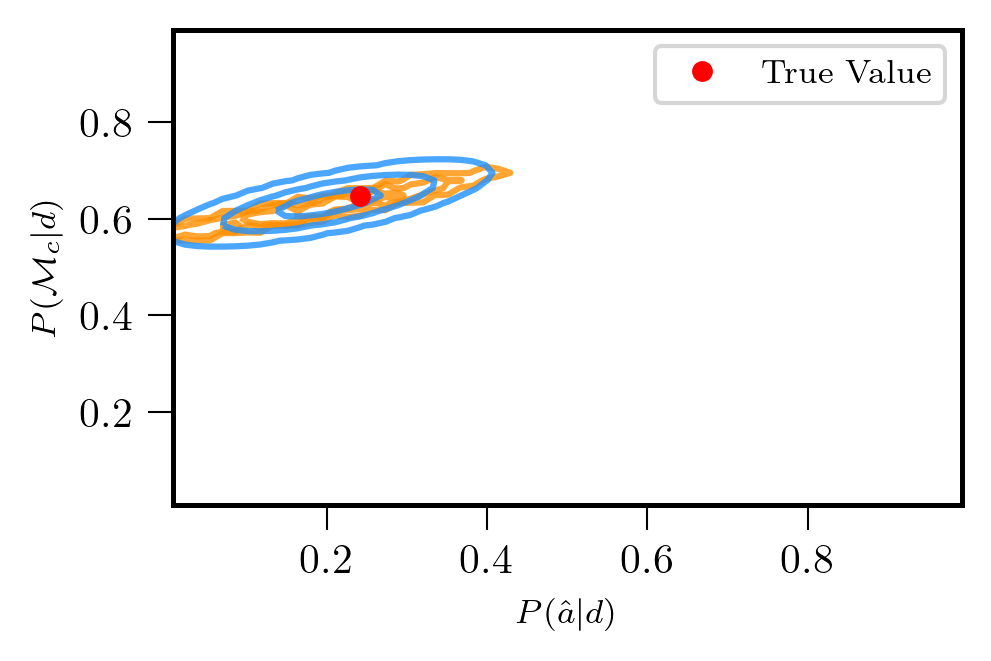

In [28]:
makecontour_RD(*mutest2, net=ringdown_network, like=sl2_2, istart=2)

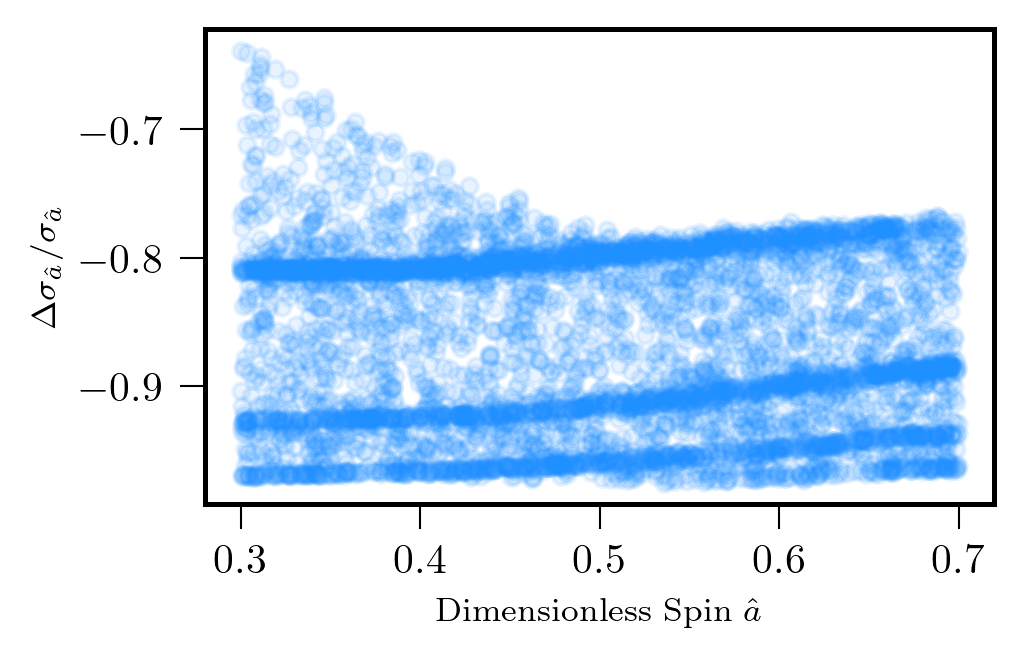

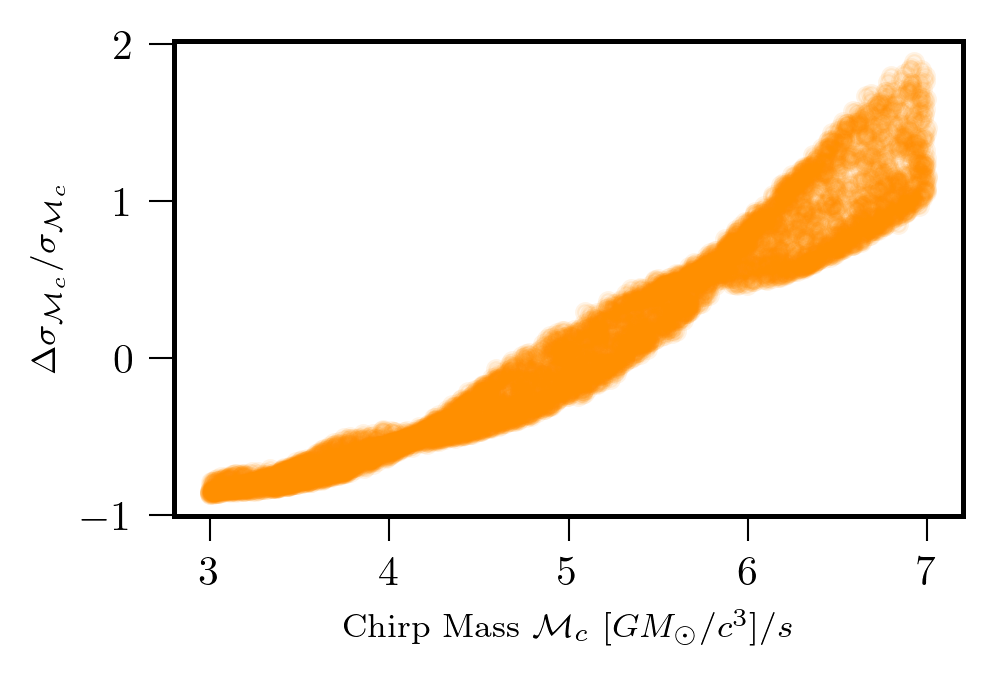

In [51]:
plotsigma_RD(*mutest2, net=ringdown_network)

In [39]:
counts3, counts4, CR = ppplots(*mutest2, net=ringdown_network)
error = err(CR)

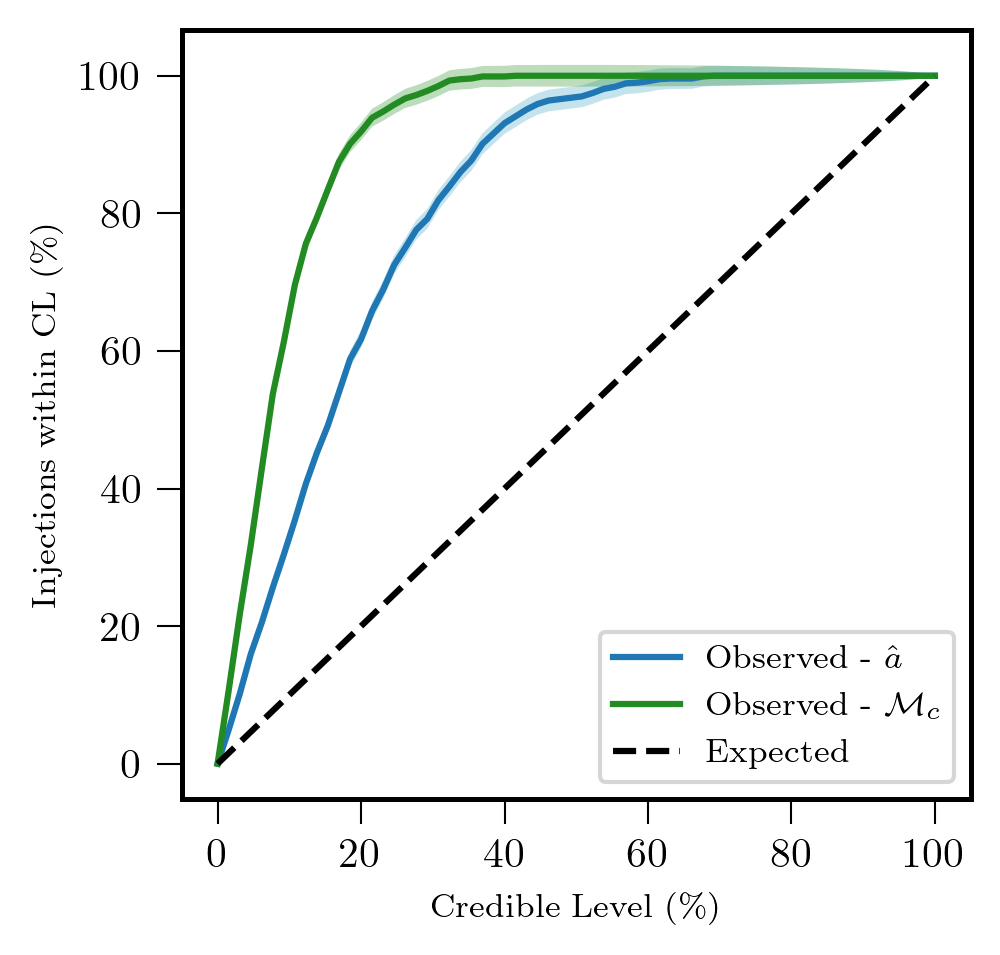

In [40]:
##plotting
N=1000
y3 = counts3/N*100
y4 = counts4/N*100
yerr=100*error
xx = np.linspace(0, 1, 11)
yy = np.linspace(0, N, 11)
pp.figure(figsize=(fig_width, fig_width))
pp.ylabel('Injections within CL ($\%$)')
pp.xlabel("Credible Level ($\%$)")
pp.plot(CR*100, y3, label='Observed - $\hat{a}$')
pp.plot(CR*100, y4, 'forestgreen', label='Observed - $\mathcal{M}_c$')
pp.fill_between(CR*100, y3-yerr, y3+yerr,facecolor='lightblue',alpha=0.7,edgecolor='none')
pp.fill_between(CR*100, y4-yerr, y4+yerr,facecolor='forestgreen',alpha=0.3,edgecolor='none')
pp.plot(xx*100, yy/N*100, 'k--', label='Expected')
pp.legend()
pp.show()

# low & hi spin

In [7]:
region2 = [[0,0.3], [3,7]] # total ranges are a [0,1], M[3, 7]
lowspin_network = percival_network()
lowspin_network.load_state_dict(torch.load(r'C:\Users\Luke\year-4-project-lisa\Luke\Term-2\Ringdown\Trained-Models\ringdown2_lowspin_l200-1024x8_2d_10000it.pt', map_location=torch.device('cpu')))
lowspin_network.eval()

mutest3 = syntrain_RD(5000, region=region2, varx=['a', 'M'], noise=1)
a = mutest3[0][:,0]
M = mutest3[0][:,1]
idx = np.argsort(a)
N=1000
counts5, counts6, CR = ppplots(*mutest3, net=lowspin_network)
y5 = counts5/N*100
y6 = counts6/N*100

In [8]:
#generate signals without noise to compare with network prediction
likeset_a_low = lambda: syntrain_RD(size=100000, varx='a', region=region2, noise=0)
likeset_M_low = lambda: syntrain_RD(size=100000, varx='M', region=region2, noise=0)
likeset_2_2_low = lambda: syntrain_RD(size=100000, varx=['a','M'], region=region2, noise=0)

In [9]:
%%time
sl_a_low = synlike(mutest3[2][:24,:], likeset_a_low, iterations=10000000)

Wall time: 2min 41s


In [10]:
%%time
sl_M_low = synlike(mutest3[2][:24,:], likeset_M_low, iterations=10000000)

Wall time: 2min 41s


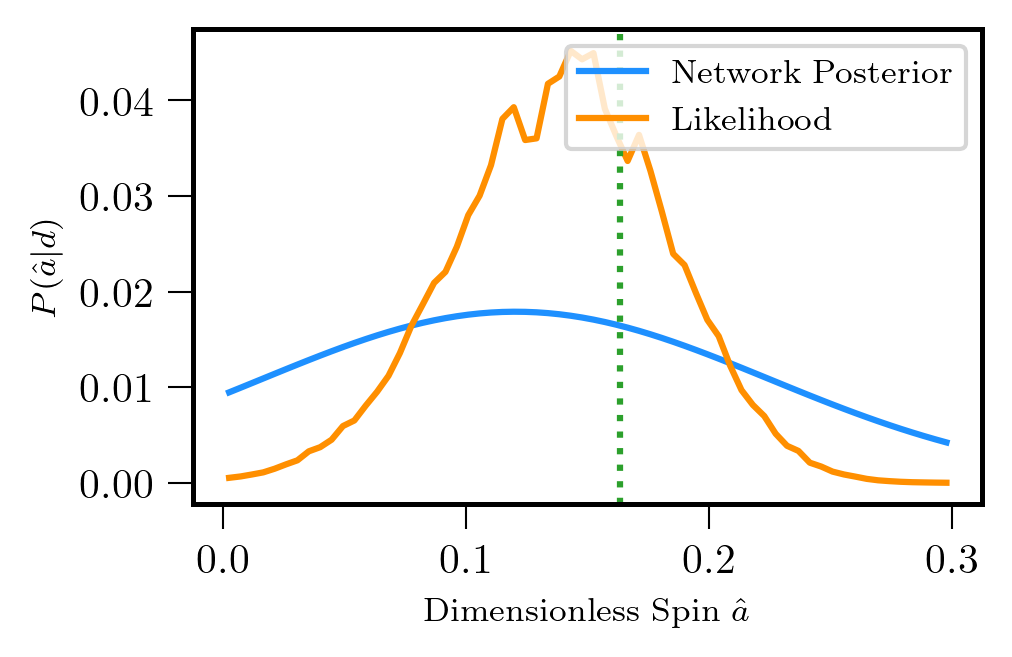

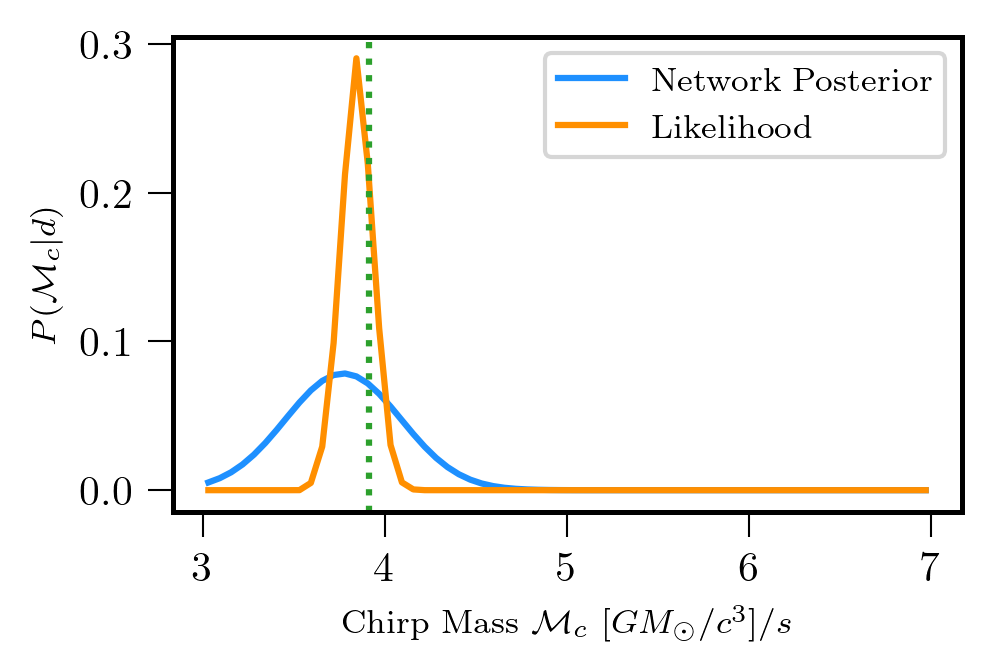

In [13]:
plotgauss_RD(*mutest3, net=lowspin_network, varx='a', region=region2, like=sl_a_low, twodim=True, istart=3)
plotgauss_RD(*mutest3, net=lowspin_network, varx='M', region=region2, like=sl_M_low, twodim=True, istart=3)

In [15]:
region3 = [[0.8,0.99], [3,7]] # total ranges are a [0,1], M[3, 7]
hispin_network = percival_network()
hispin_network.load_state_dict(torch.load(r'C:\Users\Luke\year-4-project-lisa\Luke\Term-2\Ringdown\Trained-Models\ringdown2_hispin_l200-1024x8_2d_10000it.pt', map_location=torch.device('cpu')))
hispin_network.eval()

mutest4 = syntrain_RD(5000, region=region3, varx=['a', 'M'], noise=1)
a = mutest4[0][:,0]
M = mutest4[0][:,1]
idx = np.argsort(a)

counts7, counts8, CR = ppplots(*mutest4, net=hispin_network)
y7 = counts7/N*100
y8 = counts8/N*100

In [16]:
#generate signals without noise to compare with network prediction
likeset_a_hi = lambda: syntrain_RD(size=100000, varx='a', region=region3, noise=0)
likeset_M_hi = lambda: syntrain_RD(size=100000, varx='M', region=region3, noise=0)
likeset_2_2_hi = lambda: syntrain_RD(size=100000, varx=['a','M'], region=region3, noise=0)

In [17]:
%%time
sl_a_hi = synlike(mutest4[2][:24,:], likeset_a_hi, iterations=10000000)

Wall time: 2min 49s


In [18]:
%%time
sl_M_hi = synlike(mutest4[2][:24,:], likeset_M_hi, iterations=10000000)

Wall time: 2min 52s


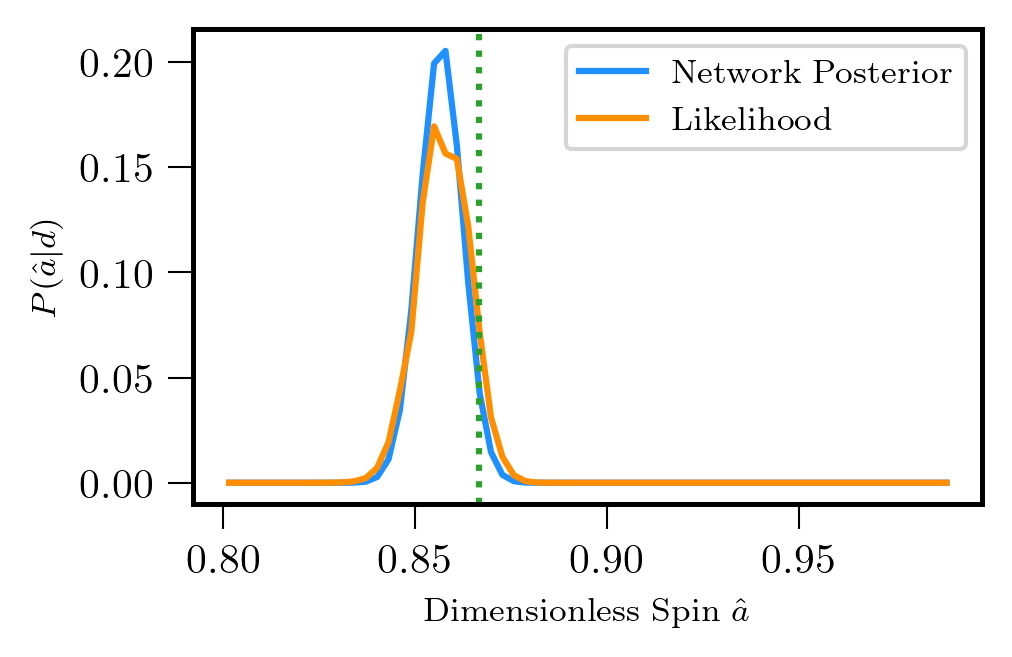

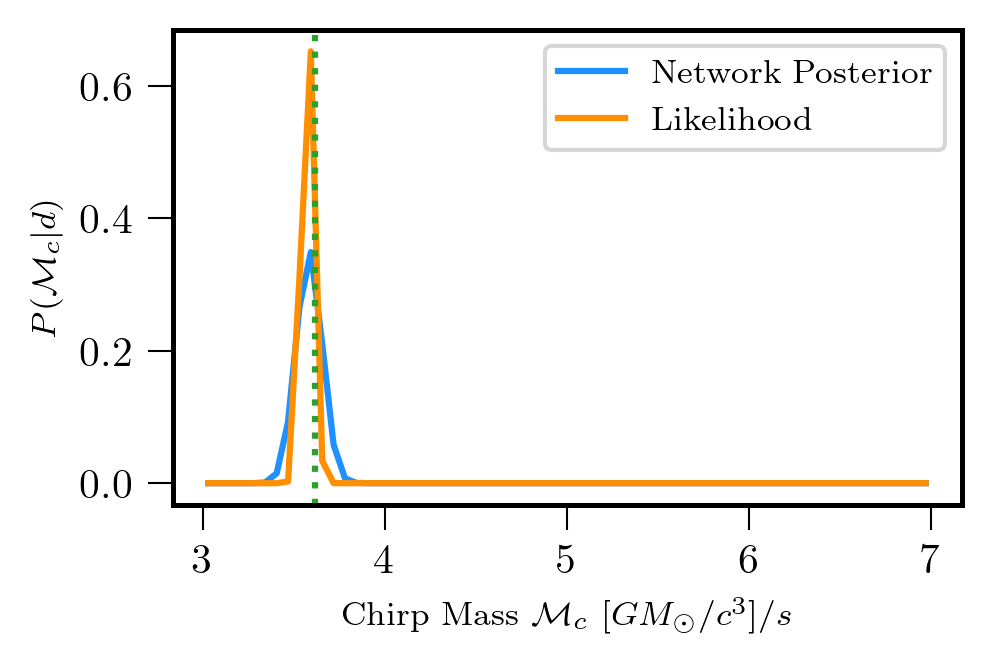

In [19]:
plotgauss_RD(*mutest4, net=hispin_network, varx='a', region=region3, like=sl_a_hi, twodim=True, istart=3)
plotgauss_RD(*mutest4, net=hispin_network, varx='M', region=region3, like=sl_M_hi, twodim=True, istart=3)

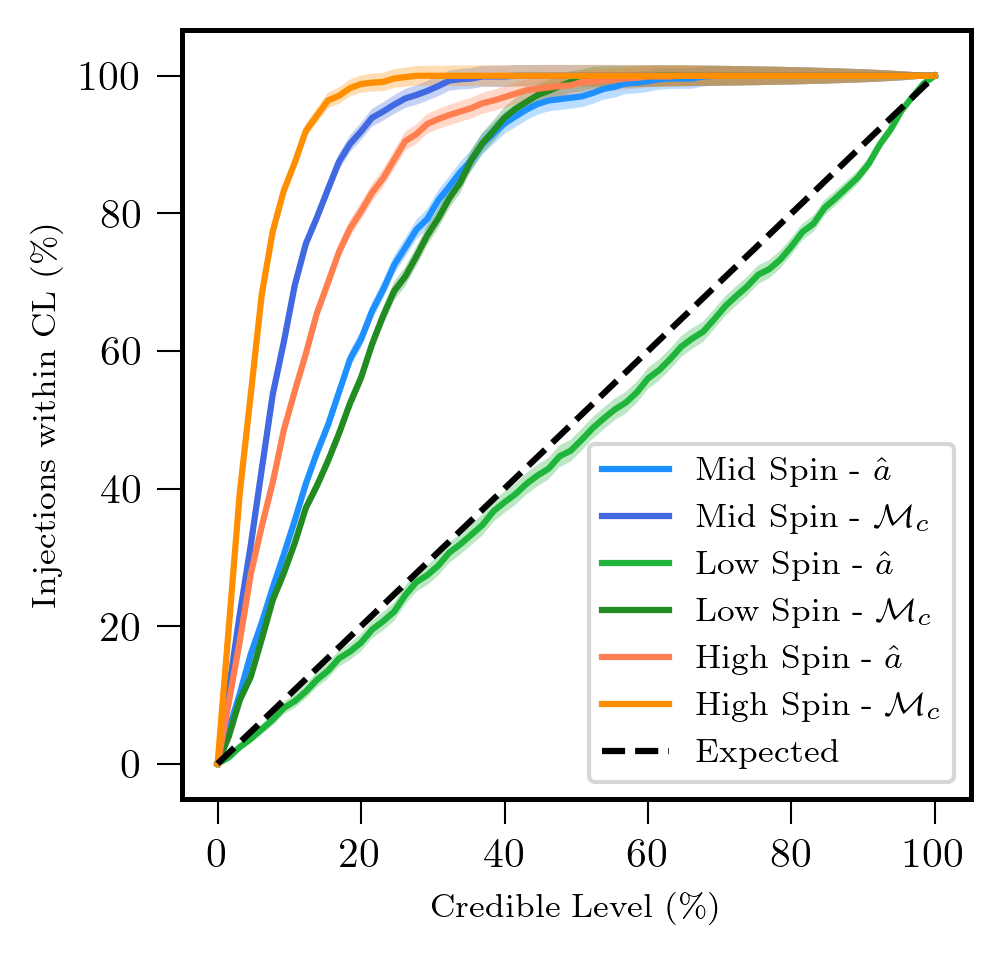

In [79]:
pp.figure(figsize=(fig_width, fig_width))
pp.ylabel('Injections within CL ($\%$)')
pp.xlabel("Credible Level ($\%$)")

pp.plot(CR*100, y3, color=dodgerblue, label='Mid Spin - $\hat{a}$')
pp.plot(CR*100, y4, 'royalblue', label='Mid Spin - $\mathcal{M}_c$')
pp.plot(CR*100, y5, color=tanzaniagreen, label='Low Spin - $\hat{a}$')
pp.plot(CR*100, y6, 'forestgreen', label='Low Spin - $\mathcal{M}_c$')
pp.plot(CR*100, y7, color='coral', label='High Spin - $\hat{a}$')
pp.plot(CR*100, y8, princetonorange, label='High Spin - $\mathcal{M}_c$')
pp.plot(xx*100, yy/N*100, 'k--', label='Expected')

pp.fill_between(CR*100, y3-yerr, y3+yerr, facecolor=dodgerblue, alpha=0.3, edgecolor='none')
pp.fill_between(CR*100, y4-yerr, y4+yerr, facecolor='royalblue', alpha=0.3, edgecolor='none')
pp.fill_between(CR*100, y5-yerr, y5+yerr, facecolor=tanzaniagreen, alpha=0.3, edgecolor='none')
pp.fill_between(CR*100, y6-yerr, y6+yerr, facecolor='forestgreen', alpha=0.3, edgecolor='none')
pp.fill_between(CR*100, y7-yerr, y7+yerr, facecolor='coral', alpha=0.3, edgecolor='none')
pp.fill_between(CR*100, y8-yerr, y8+yerr, facecolor=princetonorange, alpha=0.3, edgecolor='none')


pp.legend()
pp.show()